In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b

2.620538882402765

In [3]:
a = np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

In [4]:
y_hat = 444.1773573243596+2.620538882402765*zp
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [5]:
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

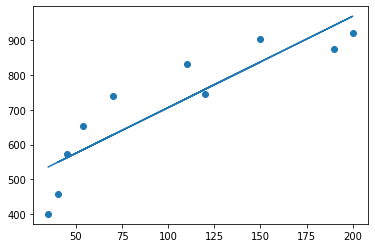

In [6]:
plt.scatter(zp, ks)
plt.plot(zp, 444.1773573243596+2.620538882402765*zp)
plt.show()

$\hat y = 444.18+2.62x$

#### То же самое, только матричным способом

In [7]:
X = zp.reshape(len(zp), 1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [8]:
Y = ks.reshape(len(ks), 1)
Y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [9]:
X = np.hstack([np.ones((len(zp), 1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

$\hat{B} = (X^TX)^{-1}X^TY$

In [10]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@Y)
B

array([[444.17735732],
       [  2.62053888]])

$\hat y = 444.18+2.62x$

#### Без intercept

In [11]:
X = zp.reshape(len(zp), 1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [12]:
Y = ks.reshape(len(ks), 1)
Y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [13]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@Y)
B

array([[5.88982042]])

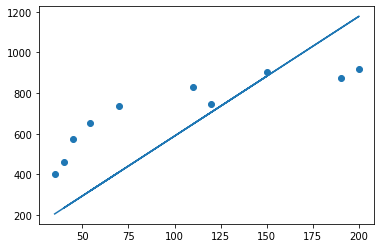

In [14]:
plt.scatter(zp, ks)
plt.plot(zp, 5.89*zp)
plt.show()

$\hat y = 5.89x$

### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [15]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-6
def mse_(B1, x = zp, y = ks, n = len(ks)):
    return np.sum((B1*x - y)**2)/n
B1 = 0.1
for i in range(10**6):
    B1 -= alpha*(2/len(ks))*np.sum((B1*zp-ks)*zp)
    if not i%10**5:
        print(f'Iteration {i}, B1 = {B1}, mse_ = {mse_(B1)}')

Iteration 0, B1 = 0.25952808, mse_ = 493237.7212546963
Iteration 100000, B1 = 5.889820420132673, mse_ = 56516.85841571943
Iteration 200000, B1 = 5.889820420132673, mse_ = 56516.85841571943
Iteration 300000, B1 = 5.889820420132673, mse_ = 56516.85841571943
Iteration 400000, B1 = 5.889820420132673, mse_ = 56516.85841571943
Iteration 500000, B1 = 5.889820420132673, mse_ = 56516.85841571943
Iteration 600000, B1 = 5.889820420132673, mse_ = 56516.85841571943
Iteration 700000, B1 = 5.889820420132673, mse_ = 56516.85841571943
Iteration 800000, B1 = 5.889820420132673, mse_ = 56516.85841571943
Iteration 900000, B1 = 5.889820420132673, mse_ = 56516.85841571943


### 3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [16]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-6
def mse_(B0, B1, x = zp, y = ks, n = len(ks)):
    return np.sum((B0 + B1*x - y)**2)/n
B0, B1, B0_, B1_ = 0.1, 0.1, 0, 0
for i in range(10**8):
    B0_ -= alpha*(2/len(ks))*np.sum((B0 + B1*zp - ks))
    B1_ -= alpha*(2/len(ks))*np.sum((B0 + B1*zp - ks)*zp)
    B0, B1 = B0_, B1_
    if not i%10**7:
        print(f'Iteration {i}, B0 = {B0}, B1 = {B1}, mse_ = {mse_(B0, B1)}')

Iteration 0, B0 = 0.0013993199999999997, B1 = 0.1595078, mse_ = 508890.0048302842
Iteration 10000000, B0 = 441.3955490573045, B1 = 2.641014221156375, mse_ = 6472.37717623709
Iteration 20000000, B0 = 444.15993361657667, B1 = 2.620667128595512, mse_ = 6470.414278185671
Iteration 30000000, B0 = 444.17724819188305, B1 = 2.6205396856660412, mse_ = 6470.414201179684
Iteration 40000000, B0 = 444.17735663935196, B1 = 2.62053888744472, mse_ = 6470.414201176663
Iteration 50000000, B0 = 444.1773572683344, B1 = 2.620538882815136, mse_ = 6470.414201176662
Iteration 60000000, B0 = 444.1773572683344, B1 = 2.620538882815136, mse_ = 6470.414201176662
Iteration 70000000, B0 = 444.1773572683344, B1 = 2.620538882815136, mse_ = 6470.414201176662
Iteration 80000000, B0 = 444.1773572683344, B1 = 2.620538882815136, mse_ = 6470.414201176662
Iteration 90000000, B0 = 444.1773572683344, B1 = 2.620538882815136, mse_ = 6470.414201176662


$\hat y = 444.18+2.62x\newline$
Это просто магия какая-то))))) У меня аж мурашки побежали, когда значения начали сходиться к правильному)))) До этого решения было несколько других с совсем не теми итогами, поэтому я пришел к такому огромному количеству итераций(думал, что это как-то поможет), но теперь понял, что хватило бы и меньше)))

Эта магия меня очень сильно заинтересовала, но у меня крайне мало времени, кажется, что я не успею ничего. Это я про курсовую...$\newline$
Я так понял, что курсовая по желанию...желание есть, но реализацию не могу обещать.$\newline$
А так, пожалуй, в).Линейная регрессия (условия применимости метода проверить ,можно с графиками,$\newline$
построить модель, исследовать на статистическую значимость модель ,можно и коэффициенты (самостоятельное изучение),$\newline$
коэффициент детерминации)